In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection

In [35]:
##reading data with pandas
df= pd.read_csv('dataset.csv')
## Taking a peak at the data
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


# Data Analysis & Preprocessing

In [36]:
#test if the data contains null values
print('Nan value',df.isnull().sum())

Nan value objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


In [37]:
#take a look at the column of the dataframe to see the features
df.columns


Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [38]:
#number of data in each class
df['class'].value_counts()

GALAXY    51323
STAR      38096
QSO       10581
Name: class, dtype: int64

#### Note by Lynda
We observe that the distribution of data in the 3 classes is unbalanced. Besides, wa can see that the galaxy class contains the most amount of data (more than 50%), the star class around 39% while the QSO gathers 11%. 

This is why we will do an over-sampling, duplicating the data in the minority classes in order to have the same number of data as the Galaxy Class

In [39]:
class0,class1,class2 = df[df['class'] == 'GALAXY'],df[df['class'] == 'STAR'],df[df['class'] == 'QSO']
count_class_0, count_class_1,count_class_2 = df['class'].value_counts()

In [40]:
class1_sampled = class1.sample(count_class_0, replace=True) #le .sample permet d'avoir des objets randoms
class2_sampled = class2.sample(count_class_0, replace=True)

df = pd.concat([class0, class1_sampled,class2_sampled], axis=0)

print('After Random over-sampling:')
print(df['class'].value_counts())


After Random over-sampling:
STAR      51323
GALAXY    51323
QSO       51323
Name: class, dtype: int64


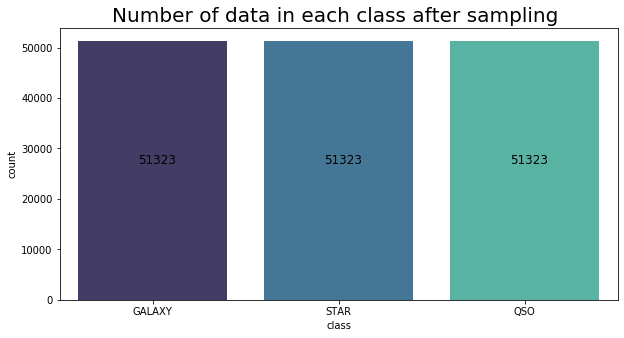

In [41]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="class", data=df, palette='mako')
plt.title('Number of data in each class after sampling ', fontsize=20)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()/2), 
    ha = 'center', va = 'center', xytext = (5, 10), textcoords = 'offset points',size=12,color='black')

#### Note  by lynda
we can see in the histograms of features, figures "X"  that the features'ra','dec', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid' are not distinct among the classes, they are not related to the characteristics of the objects.Plus as the features "Objid" and "Specobjid" were obtained thanks to a join of tables with these attributes, they are also not relevant.

Therefore they cannot be used to identify galaxies, stars and quasars and thus classes

In [42]:
# we remove useless features by deleting their columns in the data frame
df_features = df.drop(columns=['objid', 'ra','dec', 'run', 'rerun', 'camcol', 'field','specobjid', 'plate', 'mjd', 'fiberid'])
df_features

,u,g,r,i,z,class,redshift
3,18.63561,16.88346,16.09825,15.70987,15.43491,GALAXY,0.058155
4,18.88325,17.87948,17.47037,17.17441,17.05235,GALAXY,0.072210
5,15.44680,13.88656,13.06969,12.68676,12.42432,GALAXY,0.020701
6,19.10002,17.10998,16.05751,15.63390,15.26723,GALAXY,0.130948
7,16.89111,16.29741,16.25994,16.86333,16.77033,GALAXY,0.004703
...,...,...,...,...,...,...,...
71187,18.70279,18.58397,18.49807,18.29744,18.23418,QSO,1.929692
57421,19.34915,19.00526,18.97166,18.69705,18.44046,QSO,0.480607
25910,19.12707,18.76206,18.53347,18.18076,18.13458,QSO,1.689009
24927,19.34830,19.01279,18.88804,18.95060,18.82214,QSO,0.874234


In [43]:
df_features.describe()

,u,g,r,i,z,redshift
count,153969.000000,153969.000000,153969.000000,153969.000000,153969.000000,153969.000000
mean,18.703096,17.727538,17.304080,17.091605,16.963882,0.436721
std,0.801705,1.081184,1.266946,1.355072,1.426057,0.701385
min,10.611810,9.988000,9.005167,8.896696,8.947795,-0.004136
25%,18.322540,17.075300,16.431380,16.110680,15.899790,0.000073
50%,18.938210,17.814370,17.325830,17.069640,16.939060,0.072443
75%,19.305960,18.543890,18.335770,18.235520,18.160940,0.693532
max,19.599940,19.984200,31.990100,32.141470,29.383740,7.011245


In [44]:
## Encoder les classes 
# On utilisera l'encoder de scikit-learn
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df_features["class"])

In [45]:
df_features["class"] = labels

In [46]:
## Standarisation
# On utilisera la standarisation de scikit-learn
df_features = df_features.drop(columns=["class"])
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(df_features)
scaled_features

array([[-0.08417839, -0.78070044, -0.95176371, -1.01967987, -1.07217087,
        -0.539742  ],
       [ 0.22471439,  0.1405333 ,  0.1312532 ,  0.06110775,  0.06203731,
        -0.51970254],
       [-4.06172805, -3.5525779 , -3.34221183, -3.2506465 , -3.18330686,
        -0.59314318],
       ...,
       [ 0.52884231,  0.95684469,  0.97036003,  0.80376457,  0.82093663,
         1.78545699],
       [ 0.80479269,  1.18874861,  1.2502228 ,  1.37188394,  1.30307889,
         0.62378669],
       [ 0.84429614,  1.52229142,  1.58223475,  1.52179531,  1.4810808 ,
         2.22434733]])

In [47]:
scaled_features.shape

(153969, 6)

In [48]:
df_features.columns

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [49]:
# Convert numpy array to panda dataframe
df_temp = pd.DataFrame(scaled_features, columns=df_features.columns)
df_temp

,u,g,r,i,z,redshift
0,-0.084178,-0.780700,-0.951764,-1.019680,-1.072171,-0.539742
1,0.224714,0.140533,0.131253,0.061108,0.062037,-0.519703
2,-4.061728,-3.552578,-3.342212,-3.250646,-3.183307,-0.593143
3,0.495102,-0.571189,-0.983920,-1.075744,-1.189754,-0.435956
4,-2.260174,-1.322747,-0.824141,-0.168460,-0.135725,-0.615952
...,...,...,...,...,...,...
153964,-0.000382,0.792127,0.942419,0.889871,0.890780,2.128612
153965,0.805853,1.181784,1.316224,1.184771,1.035431,0.062572
153966,0.528842,0.956845,0.970360,0.803765,0.820937,1.785457
153967,0.804793,1.188749,1.250223,1.371884,1.303079,0.623787


In [50]:
# Décomposition de notre jeu de données en ensemble d'entrainement+validation et en un ensemble de test 
test_ratio = 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df_temp, labels, test_size = test_ratio)
X_train

,u,g,r,i,z,redshift
109111,1.000489,1.456326,1.532067,1.460625,1.486452,1.630539
75636,0.793180,0.197564,0.062300,0.063624,0.061764,-0.622702
87244,-0.362050,-0.290644,0.020980,0.190865,0.328795,-0.622551
95817,0.374433,0.277365,0.345201,0.398405,0.443461,-0.623423
41148,0.486408,0.595545,0.668681,0.593436,0.700583,-0.476093
...,...,...,...,...,...,...
16863,0.699804,-0.088531,-0.440430,-0.671446,-0.817306,-0.519565
10915,-2.463840,-1.892467,-1.549194,-1.487029,-1.417649,-0.549798
11395,0.629129,0.081339,-0.442522,-0.625567,-0.765015,-0.373869
43094,0.219326,-0.002912,-0.009819,-0.054850,-0.102220,-0.536048


# ML Models

In [51]:
# Modele bayesien fait à la main 
class BayesienNaif_Gaussian:
    def __init__(self,K): ## instanciation d'un objet du type de la classe.
        self.K = K
    
    def fit(self, X, y):
        N = X.shape[0]
        D = X.shape[1]
        K = self.K
        self.mkd = np.zeros((K,D))
        self.skd = np.zeros((K,D))
        self.Pk = np.zeros(K)

        for k in range(0,K):
            #Nb d'elements d'une classe
            denominateur = (y==k).sum()
            
            #Mise a jour de mu
            numerateurMoy = np.sum(X[y==k], axis=0)
            self.mkd[k,:] = numerateurMoy[:] / denominateur # vecteur de taille D
            
            #Mise a jour de sigma²
            numerateurSig = np.sum(np.subtract(X[y==k], self.mkd[k,:])**2, axis=0) 
            self.skd[k,:] = numerateurSig[:] / denominateur # vecteur de taille D
            
            #Probabilité qu'une donnée prise au hasard soit de la classe K
            self.Pk[k] = denominateur/N
        return self
    
    def predict_proba(self, X):
        N = X.shape[0]
        pi = 3.14159265
        eps = 1e-8
        K = self.K
        ypreds = np.zeros((K, N))

        for k in range (K):
            num = -np.subtract(X, self.mkd[k])**2
            denominateur = (eps + (2*(self.skd[k])))
            
            #Terme1 = -(x-mu)²/2sigma²
            terme1 = num/denominateur        # vecteur de taille D
            
            #Terme2 = log(1/racine(2.PI.sigma²))
            terme2 = np.log(1./(eps + np.sqrt(2*pi*(self.skd[k]))))   # vecteur de taille D
            
            #Somme sur D
            ypreds[k] = np.sum(np.add (terme1, terme2), axis=1)\
                        + np.log(self.Pk[k])
            
        #Softmax pour avoir des probas
        softmax_ypreds = np.divide(np.exp(ypreds), np.sum(np.exp(ypreds), axis=0)).T
        return softmax_ypreds
    
    def predict(self, X):
        y_proba = self.predict_proba(X)
        y_pred = np.argmax(y_proba, axis=1)
        return y_pred
    

In [52]:
model = BayesienNaif_Gaussian(3)
model.fit(X_train, Y_train)
probas = model.predict_proba(X_test)
ypred_test = model.predict(X_test)

#Calcule du score sur test (Nombre d'elements bien classés/N)
score = 1 - (ypred_test - Y_test != 0 ).mean()
print ("Score (Nombre d'éléments bien classés/N) : ", score) 


Score (Nombre d'éléments bien classés/N) :  0.9611612651815289


In [53]:
from sklearn.metrics import roc_auc_score

#Metrique AUC ROC
roc = roc_auc_score(Y_test, probas, multi_class='ovo')
print ("Aire Courbe ROC: ", roc) 

Aire Courbe ROC:  0.9837909548418379


# Visualisation des courbes ROC

In [54]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [55]:
#  courbe roc et auc pour chaque classe

Y_test_binarize = label_binarize(Y_test, classes=[0, 1, 2])
n_classes = Y_test_binarize.shape[1]
    
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve( Y_test_binarize[:, i], probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


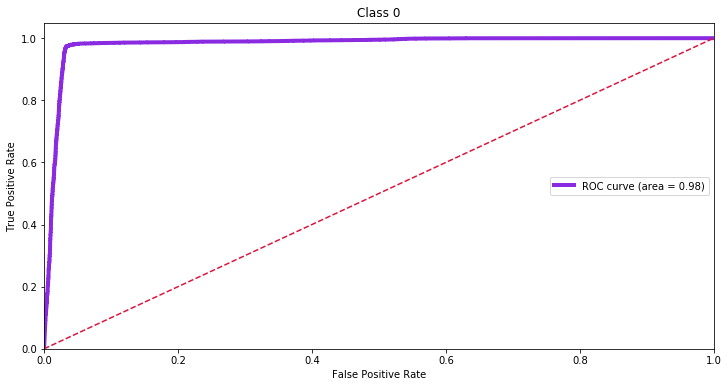

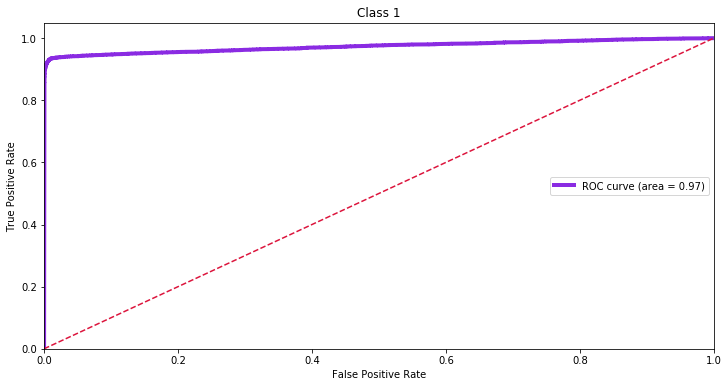

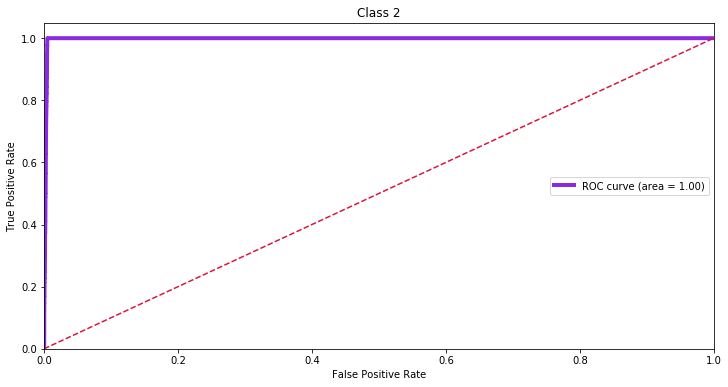

In [56]:
#vicualiation de la courbe roc et auc pour chaque classe 
for i in range(n_classes):
    plt.figure(figsize=(12,6))
    plt.plot(fpr[i], tpr[i], color='blueviolet',linewidth=4,label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='crimson',linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    title = ("Class "+ str(i))
    plt.title(title)
    plt.legend(loc="center right")


In [57]:
#coube ROC pour toutes les classes
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarize.ravel(), probas.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

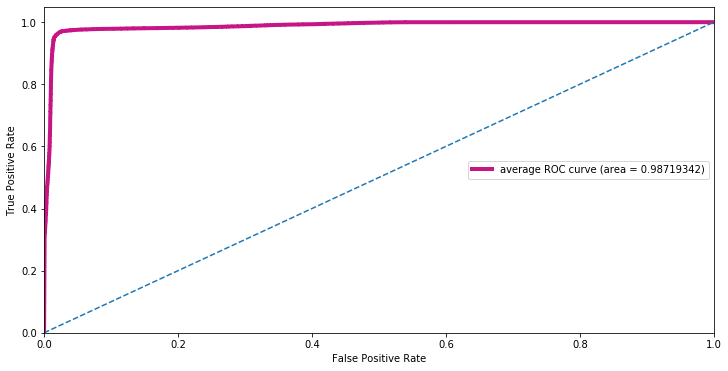

In [58]:
# Plot all ROC curves
plt.figure(figsize=(12,6))
plt.plot(fpr["micro"], tpr["micro"],label='average ROC curve (area = {0:0.8f})'''.format(roc_auc["micro"]),
         color='mediumvioletred', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="center right")


In [30]:
## Autres Algos pour comparer Sans optimisation des hyper param

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
model_name = ["Nearest Neighbors",
     "Decision Tree", "Random Forest", 
     "Naive Bayes"]
model_list = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=20),
    GaussianNB()
    ]

s_train = []
s_test = []
for i in range(len(model_list)):
    s_prime = cross_validate(model_list[i], X_train, Y_train,cv=5, scoring='roc_auc_ovo', return_train_score=True)
    s_train.append(s_prime['train_score'].mean())
    s_test.append(s_prime['test_score'].mean())
    d = {'Score_train': s_train, 
            'Score_test': s_test} 

In [27]:
s_test

[0.9911630046969883, 0.9962974276196916, 0.998346514494524, 0.983447354458525]

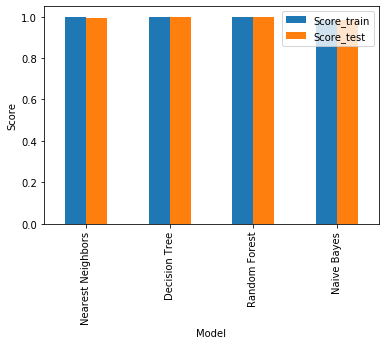

In [29]:
#Plot
sd = pd.DataFrame(d, index=[model_name[i] for i in range(len(model_name))] ) 
ax = sd.plot.bar()
ax.set_ylabel("Score")
ax.set_xlabel("Model")
plt.show()